<a href="https://colab.research.google.com/github/dnz-s/Turkish-Sentiment-Analysis-of-Tweets-First_Attempt/blob/main/Sentiment_Analysis_Elon_Musk's_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install NumPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install credentials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'CONSUMER_KEY'
CONSUMER_SECRET = 'CONSUMER_SECRET'

# Access:
ACCESS_TOKEN  = 'ACCESS_TOKEN'
ACCESS_SECRET = 'ACCESS_SECRET'

The reason of creating this extra file is that we want to export only the value of this variables, 
but being unseen in our main code (our notebook). We are now able to consume Twitter API. 
In order to do this, we will create a function to allow us our keys authentication. 
We will add this function in another cell of code and we will run it:

In [5]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

In [6]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [7]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="ElonMusk", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

@farzyness Yeah

@WholeMarsBlog Exactly

Some nights … https://t.co/BLAUsJr4wb

@MuskUniversity May it always be so. It is the most treasured item on my bedside table. https://t.co/rJ1pWlUfLs

@JohnnaCrider1 They never had my name either



We now have initial information to construct a pandas DataFrame, in order to manipulate the info in a very easy way.
IPython's display function plots an output in a friendly way, and the headmethod of a dataframe allows us to visualize the first 5 elements of the dataframe (or the first number of elements that are passed as an argument).

So, using Python's list comprehension:

In [8]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

In [9]:
#We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,@farzyness Yeah
1,@WholeMarsBlog Exactly
2,Some nights … https://t.co/BLAUsJr4wb
3,@MuskUniversity May it always be so. It is the...
4,@JohnnaCrider1 They never had my name either
5,@BillyM2k wise words
6,@MedvedevRussiaE Those are definitely the most...
7,@JohnnaCrider1 @MedvedevRussiaE Haha 💯
8,@alifarhat79 🤣
9,@JonErlichman Wow


So we now have a nice table with ordered data.

An interesting thing is the number if internal methods that the tweetstructure has in Tweepy:

In [10]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


#The interesting part from here is the quantity of metadata contained in a single tweet. If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes. An example is the following:

In [11]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1607597093278957568
2022-12-27 04:39:49
Twitter for iPhone
11212
475
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'farzyness', 'name': 'Farzad Mesbahi', 'id': 17862108, 'id_str': '17862108', 'indices': [0, 10]}], 'urls': []}


Adding relevant info to our dataframe
As we can see, we can obtain a lot of data from a single tweet. But not all this data is always useful for specific stuff. In our case we well just add some data to our dataframe. For this we will use Pythons list comprehension and a new column will be added to the dataframe by just simply adding the name of the content between square brackets and assign the content. The code goes as...:

In [12]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

And to display again the dataframe to see the changes we just...:

In [13]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,@farzyness Yeah,15,1607597093278957568,2022-12-27 04:39:49,Twitter for iPhone,11212,475
1,@WholeMarsBlog Exactly,22,1607593196871188480,2022-12-27 04:24:20,Twitter for iPhone,4875,203
2,Some nights … https://t.co/BLAUsJr4wb,37,1607590239874211847,2022-12-27 04:12:35,Twitter for iPhone,346602,23245
3,@MuskUniversity May it always be so. It is the...,111,1607584023932719104,2022-12-27 03:47:53,Twitter for iPhone,28898,2331
4,@JohnnaCrider1 They never had my name either,44,1607581330673668103,2022-12-27 03:37:11,Twitter for iPhone,34430,1028
5,@BillyM2k wise words,20,1607575338967568384,2022-12-27 03:13:22,Twitter for iPhone,5638,278
6,@MedvedevRussiaE Those are definitely the most...,140,1607565268150091778,2022-12-27 02:33:21,Twitter for iPhone,17106,899
7,@JohnnaCrider1 @MedvedevRussiaE Haha 💯,38,1607560938458157056,2022-12-27 02:16:09,Twitter for iPhone,4019,183
8,@alifarhat79 🤣,14,1607539589735923712,2022-12-27 00:51:19,Twitter for iPhone,10815,428
9,@JonErlichman Wow,17,1607530626923786242,2022-12-27 00:15:42,Twitter for iPhone,40312,1357


Averages and popularity
We first want to calculate some basic statistical data, such as the mean of the length of characters of all tweets, the tweet with more likes and retweets, etc.

From now, I'll just add some input code and the output right below the code.

To obtain the mean, using numpy:

In [14]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 56.5


In [15]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Tweets are read ~100 times more than they are liked
Number of likes: 566434
51 characters.

The tweet with more retweets is: 
Government paid Twitter millions of dollars to censor info from the public https://t.co/eSEwcZlGjt
Number of retweets: 91027
98 characters.



In [16]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

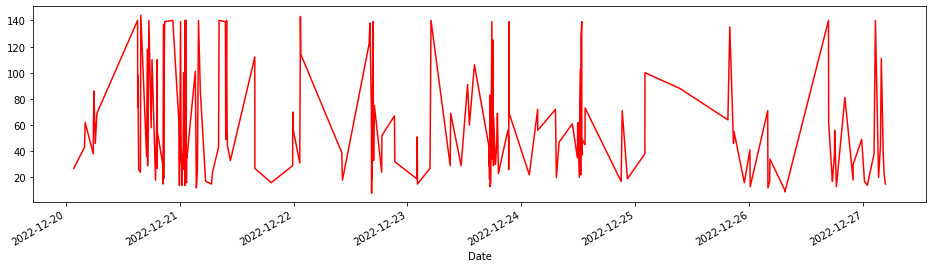

In [17]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

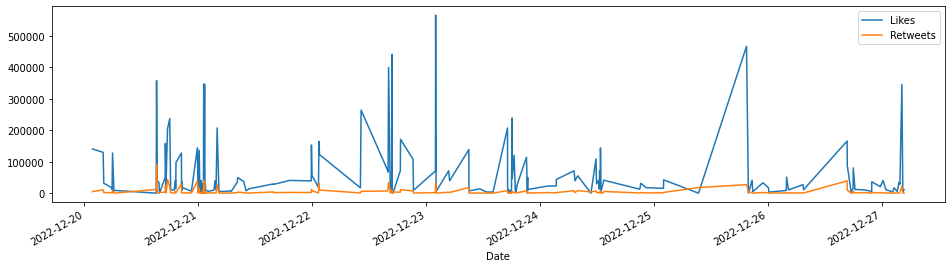

In [18]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [19]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


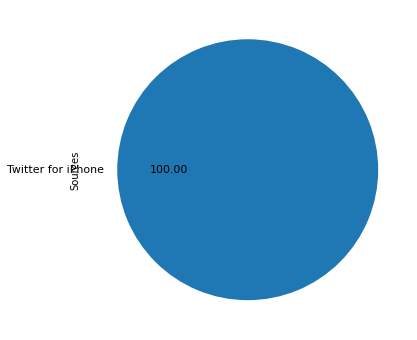

In [20]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [21]:
from textblob import TextBlob
import re

In [22]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [23]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [24]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@farzyness Yeah,15,1607597093278957568,2022-12-27 04:39:49,Twitter for iPhone,11212,475,0
1,@WholeMarsBlog Exactly,22,1607593196871188480,2022-12-27 04:24:20,Twitter for iPhone,4875,203,1
2,Some nights … https://t.co/BLAUsJr4wb,37,1607590239874211847,2022-12-27 04:12:35,Twitter for iPhone,346602,23245,0
3,@MuskUniversity May it always be so. It is the...,111,1607584023932719104,2022-12-27 03:47:53,Twitter for iPhone,28898,2331,1
4,@JohnnaCrider1 They never had my name either,44,1607581330673668103,2022-12-27 03:37:11,Twitter for iPhone,34430,1028,0
5,@BillyM2k wise words,20,1607575338967568384,2022-12-27 03:13:22,Twitter for iPhone,5638,278,1
6,@MedvedevRussiaE Those are definitely the most...,140,1607565268150091778,2022-12-27 02:33:21,Twitter for iPhone,17106,899,1
7,@JohnnaCrider1 @MedvedevRussiaE Haha 💯,38,1607560938458157056,2022-12-27 02:16:09,Twitter for iPhone,4019,183,1
8,@alifarhat79 🤣,14,1607539589735923712,2022-12-27 00:51:19,Twitter for iPhone,10815,428,0
9,@JonErlichman Wow,17,1607530626923786242,2022-12-27 00:15:42,Twitter for iPhone,40312,1357,1


In [25]:
data.to_excel('output1.xlsx')

In [26]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]


In [27]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 42.0%
Percentage of neutral tweets: 49.5%
Percentage de negative tweets: 8.5%
